(3, 3, 1, 32) (32,)
-0.024795271 0.19444875


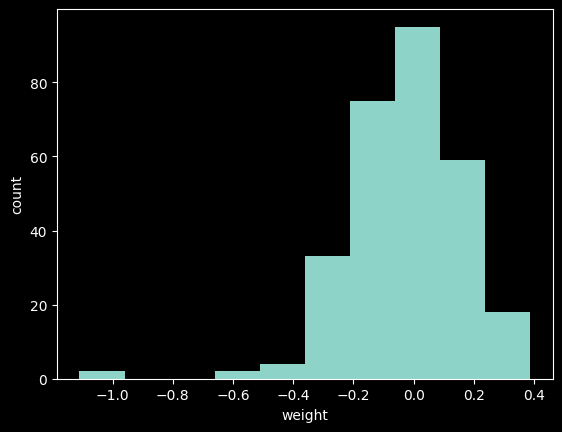

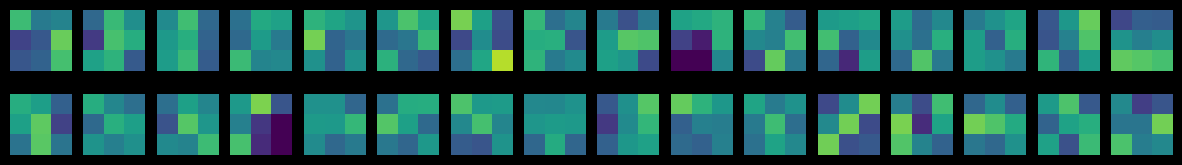

(3, 3, 1, 32)
-0.0007786583 0.08419124


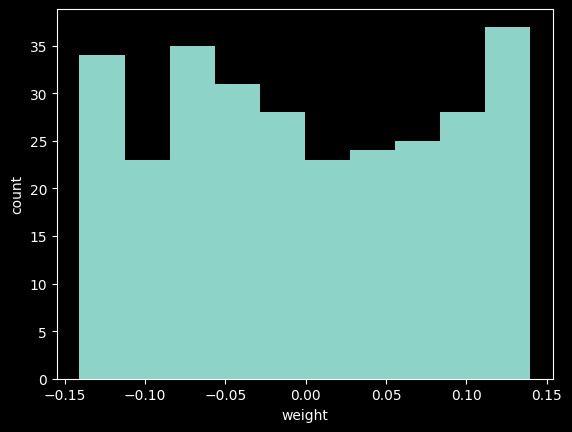

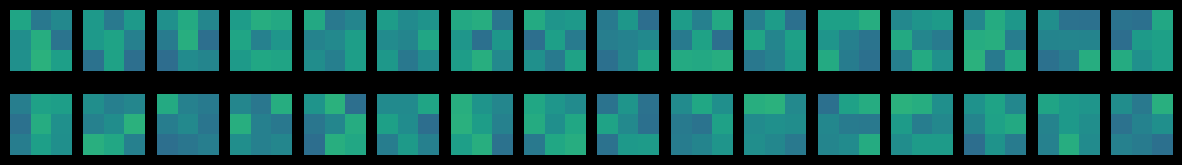

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, ragged=False, name=input_layer_2>]


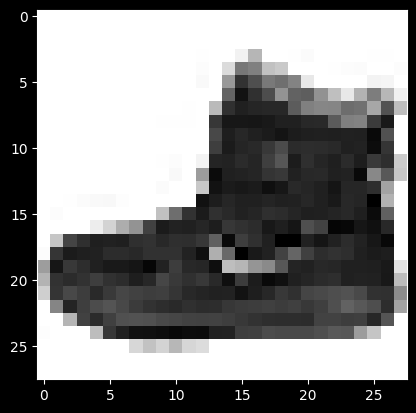

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


2025-11-23 19:04:41.964593: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


(1, 28, 28, 32)


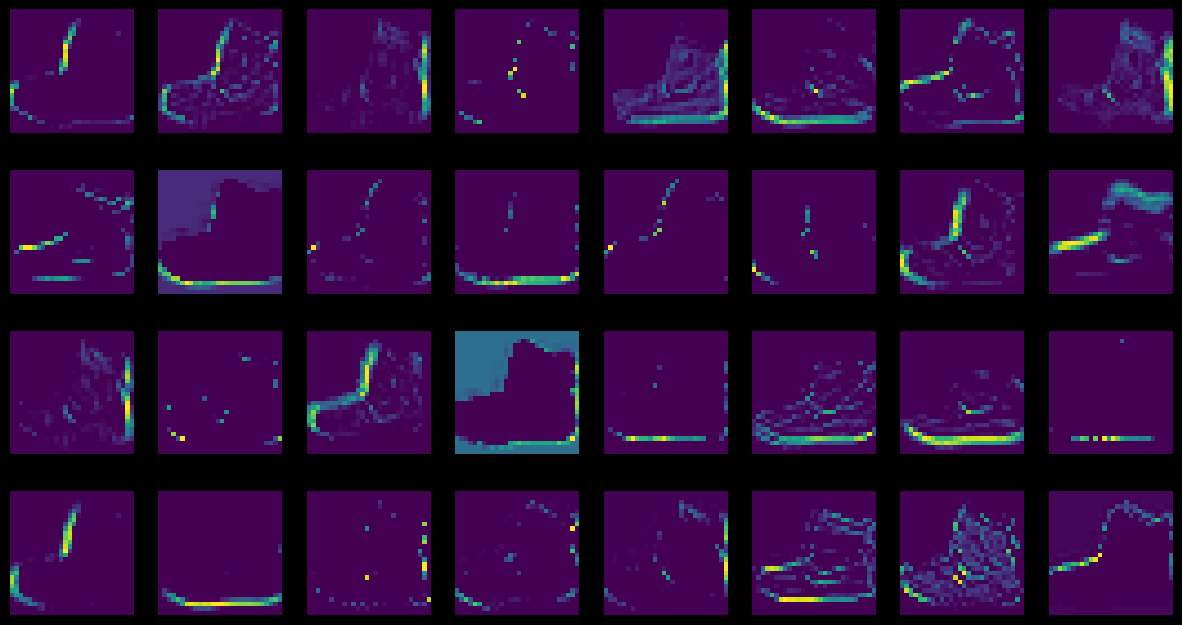

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
(1, 6272)
feature_maps.shape: (1, 6272)


ValueError: feature_maps는 (H, W, C) 형태여야 합니다.

In [12]:
import keras
import tensorflow as tf

keras.utils.set_random_seed(42)
tf.random.set_seed(42)
tf.config.experimental.enable_op_determinism()


import keras
model = keras.models.load_model('best-cnn-model.keras')
assert model is not None
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

import matplotlib.pyplot as plt 

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()


fig, axs = plt.subplots(2,16,figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Input(shape=(28,28,1)))
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation=\
    'relu', padding='same'))
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i,j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
        axs[i,j].axis('off')

plt.show()

inputs = keras.Input(shape=(784,))
dense1 = keras.layers.Dense(100, activation = 'relu')
dense2 = keras.layers.Dense(10, activation='softmax')

hidden = dense1(inputs)
outputs = dense2(hidden)

fuc_model = keras.Model(inputs, outputs)
print(model.inputs)
conv_acti = keras.Model(model.inputs, model.layers[0].output)

(train_input, train_target), (test_input, test_target)=\
    keras.datasets.fashion_mnist.load_data()

plt.imshow(train_input[0], cmap='gray_r')
plt.show()

ankle_boot = train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps = conv_acti.predict(ankle_boot)
print(feature_maps.shape)

fig, axs = plt.subplots(4,8,figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()

conv2_acti = keras.Model(model.inputs, model.layers[2].output)
feature_maps = conv2_acti.predict(ankle_boot)

print(feature_maps.shape)

import numpy as np
import matplotlib.pyplot as plt

# feature_maps의 차원 확인
print("feature_maps.shape:", feature_maps.shape)

fm = feature_maps

# 4D인 경우: (batch, H, W, C) -> (H, W, C) 로 바꾸기
if fm.ndim == 4:
    fm = fm[0]     # (H, W, C)

# 3D인 경우: (H, W, C)
if fm.ndim != 3:
    raise ValueError("feature_maps는 (H, W, C) 형태여야 합니다.")

H, W, C = fm.shape
print("H, W, C:", H, W, C)

rows = cols = 8   # 8x8 = 64개까지 보여줄 준비

fig, axs = plt.subplots(rows, cols, figsize=(12, 12))

for idx in range(rows * cols):
    if idx >= C:   # 채널 개수보다 많으면 그만
        break
    i = idx // cols
    j = idx % cols

    axs[i, j].imshow(fm[:, :, idx], cmap='gray')
    axs[i, j].axis('off')

plt.tight_layout()
plt.show()
